# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn.feature_selection import VarianceThreshold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Explatory Data Analysis & Data Preprocessing

In [2]:
df = pd.read_csv("./iris.csv")

In [3]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
df['variety'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [5]:
df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [6]:
df.shape

(150, 5)

In [7]:
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [8]:
df.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

In [9]:
df.isna().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df.describe().T.style.background_gradient(cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
sepal.length,150.000000,5.843333,0.828066,4.300000,5.100000,5.800000,6.400000,7.900000
sepal.width,150.000000,3.057333,0.435866,2.000000,2.800000,3.000000,3.300000,4.400000
petal.length,150.000000,3.758000,1.765298,1.000000,1.600000,4.350000,5.100000,6.900000
petal.width,150.000000,1.199333,0.762238,0.100000,0.300000,1.300000,1.800000,2.500000


In [13]:
df["variety"].value_counts()

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

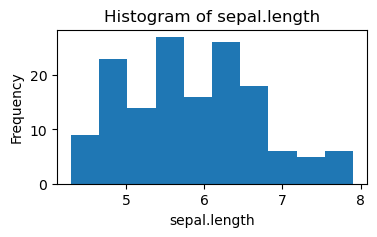

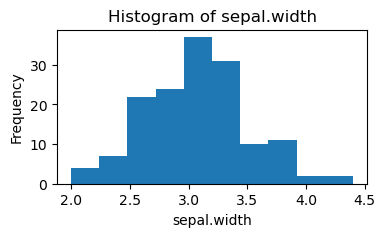

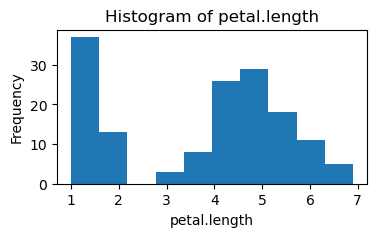

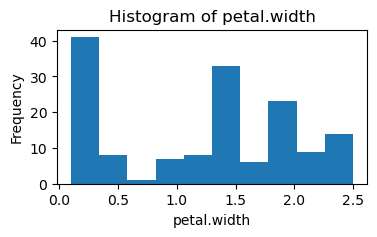

In [14]:
numerical_columns = df.columns[:-1]
for col in numerical_columns:
    plt.figure(figsize=(4,2))
    plt.hist(df[col])
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

<Axes: xlabel='variety', ylabel='count'>

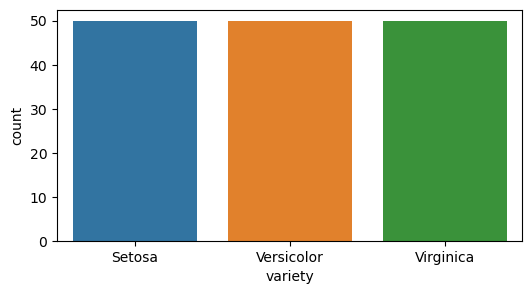

In [15]:
plt.figure(figsize=(6,3))
sns.countplot(x="variety", data=df)

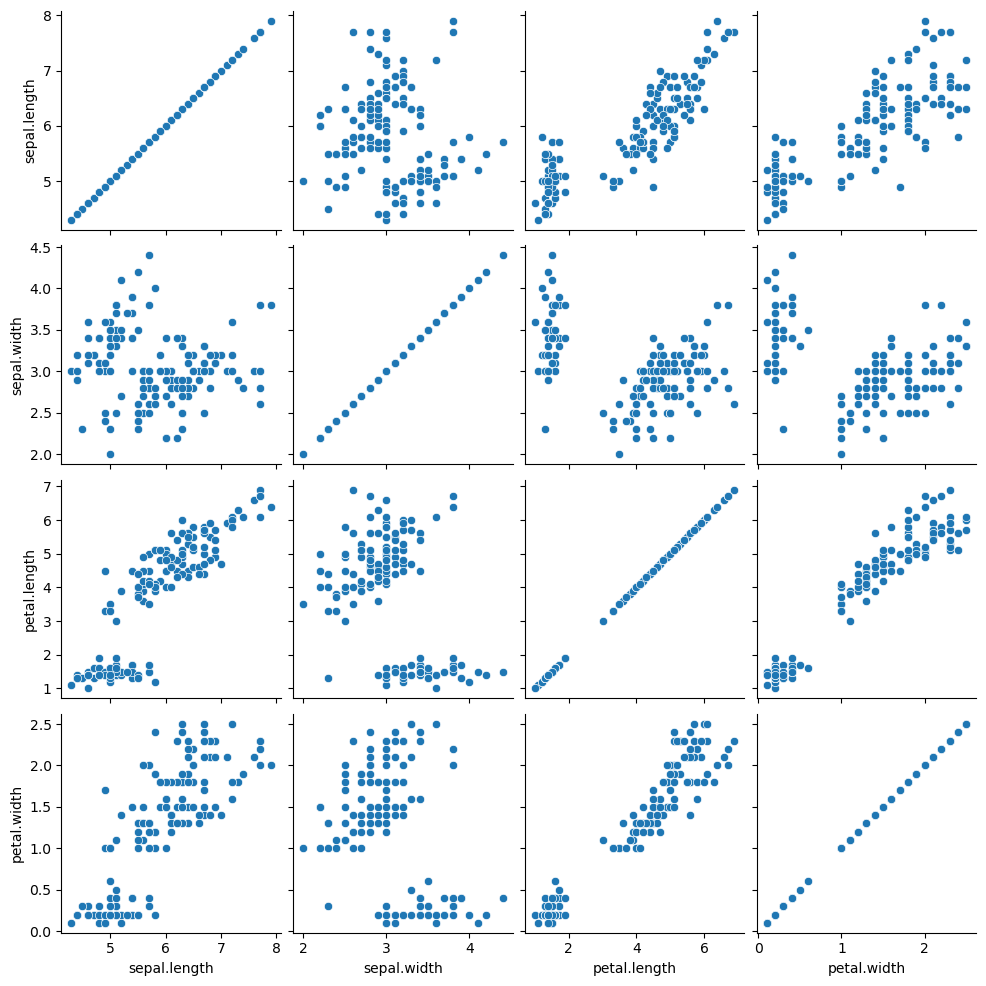

In [16]:
sns.pairplot(df, diag_kind = None);

In [17]:
corr_matrix = df.iloc[:, :-1].corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


In [18]:
cov_matrix = df.iloc[:, :-1].cov()
cov_matrix.style.background_gradient(cmap='coolwarm')

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,0.685694,-0.042434,1.274315,0.516271
sepal.width,-0.042434,0.189979,-0.329656,-0.121639
petal.length,1.274315,-0.329656,3.116278,1.295609
petal.width,0.516271,-0.121639,1.295609,0.581006


<Axes: >

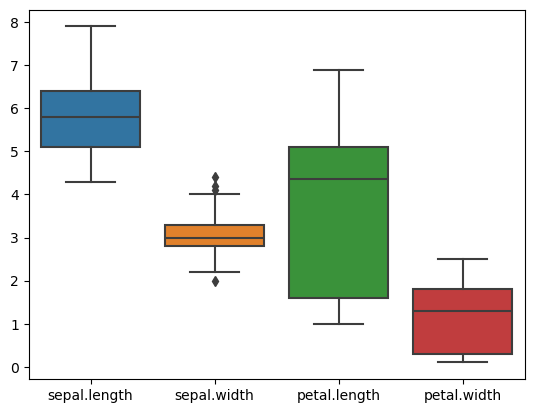

In [19]:
sns.boxplot(data=df)

In [20]:
# remove outliers with IQR
for c in df.columns[:-1]:
    Q1 = np.percentile(df[c], 25)
    Q3 = np.percentile(df[c], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[c] >= lower_bound) & (df[c] <= upper_bound)]

<Axes: >

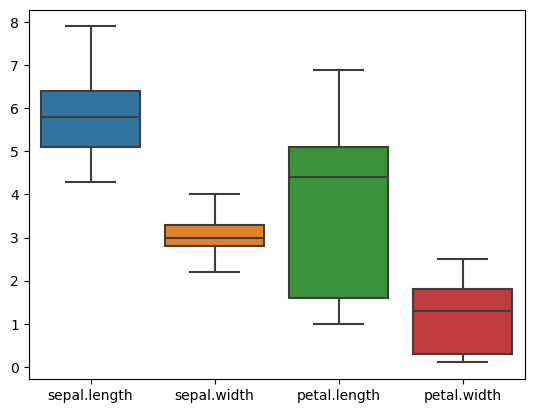

In [21]:
sns.boxplot(data=df)

In [22]:
X = df.drop("variety", axis=1)
Y = df['variety']
X.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

In [24]:
# train = 60
# validation = 20
# test = 20
# tr = 60/80
# te = 20/80
# print(te, tr)


In [25]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, Y, test_size=0.20, random_state=2, stratify=Y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=2, stratify=y_train_val)

In [26]:
# ltr = len(X_train)
# lva = len(X_val)
# lte = len(X_test)
# print(ltr, lva, lte)
# total = ltr+lva+lte
# print(ltr/total, lva/total, lte/total)

In [27]:
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
X_train = standard_scaler.transform(X_train)
X_val = standard_scaler.transform(X_val)
X_test = standard_scaler.transform(X_test)

In [28]:
# min_max_scaler = MinMaxScaler()
# min_max_scaler.fit(X_train)
# X_train = min_max_scaler.transform(X_train)
# X_val = min_max_scaler.transform(X_val)
# X_test = min_max_scaler.transform(X_test)

# Model Evaluation

In [29]:
def evaluate_model(model, X_train, y_train, X_val, y_val):
    
    model.fit(X_train, y_train)
    
    # train
    pred_train = model.predict(X_train)
    accuracy_train = accuracy_score(y_train, pred_train)
    f1_train = f1_score(y_train, pred_train, average='weighted', zero_division=True)
    precision_train = precision_score(y_train, pred_train, average='weighted', zero_division=True)
    recall_train = recall_score(y_train, pred_train, average='weighted', zero_division=True)
    
    # validation
    pred_val = model.predict(X_val)
    accuracy_val = accuracy_score(y_val, pred_val)
    f1_val = f1_score(y_val, pred_val, average='weighted', zero_division=True)
    precision_val = precision_score(y_val, pred_val, average='weighted', zero_division=True)
    recall_val = recall_score(y_val, pred_val, average='weighted', zero_division=True)   
    
    
    metrix = [f1_train, accuracy_train, precision_train, recall_train, 
              f1_val, accuracy_val, precision_val, recall_val]
    
    columns_metrix = ['f1_train', 'accuracy_train', 'precision_train', 'recall_train', 
                      'f1_val', 'accuracy_val', 'precision_val', 'recall_val']


    evaluate_df = pd.DataFrame([metrix], columns=columns_metrix)
    
    return evaluate_df

In [30]:
def evaluate_grid_search(model, X_train, y_train, X_val, y_val):
    # train
    pred_train = model.predict(X_train)
    accuracy_train = accuracy_score(y_train, pred_train)
    f1_train = f1_score(y_train, pred_train, average='weighted', zero_division=True)
    precision_train = precision_score(y_train, pred_train, average='weighted', zero_division=True)
    recall_train = recall_score(y_train, pred_train, average='weighted', zero_division=True)
    
    # validation
    pred_val = model.predict(X_val)
    accuracy_val = accuracy_score(y_val, pred_val)
    f1_val = f1_score(y_val, pred_val, average='weighted', zero_division=True)
    precision_val = precision_score(y_val, pred_val, average='weighted', zero_division=True)
    recall_val = recall_score(y_val, pred_val, average='weighted', zero_division=True)    
    
    
    metrix = [f1_train, accuracy_train, precision_train, recall_train, 
              f1_val, accuracy_val, precision_val, recall_val]
    
    columns_metrix = ['f1_train', 'accuracy_train', 'precision_train', 'recall_train', 
                      'f1_val', 'accuracy_val', 'precision_val', 'recall_val']


    evaluate_df = pd.DataFrame([metrix], columns=columns_metrix)
    
    return evaluate_df

## Naive Bayes

In [31]:
naive_bayes = GaussianNB()
results = evaluate_model(naive_bayes, X_train, y_train, X_val, y_val)
results.index = ['naive_bayes']
results.sort_values(by='f1_val',ascending=False).style.background_gradient(cmap = 'flare')

,f1_train,accuracy_train,precision_train,recall_train,f1_val,accuracy_val,precision_val,recall_val
naive_bayes,0.977011,0.977011,0.977011,0.977011,0.931034,0.931034,0.931034,0.931034


## Random Forest

In [32]:
random_forest = RandomForestClassifier(random_state=31)
rf = evaluate_model(random_forest, X_train, y_train, X_val, y_val)
rf.index = ['random_forest']
results = pd.concat([rf, results], axis=0)
results.sort_values(by='f1_val',ascending=False).style.background_gradient(cmap = 'flare')

,f1_train,accuracy_train,precision_train,recall_train,f1_val,accuracy_val,precision_val,recall_val
random_forest,1.000000,1.000000,1.000000,1.000000,0.965431,0.965517,0.968652,0.965517
naive_bayes,0.977011,0.977011,0.977011,0.977011,0.931034,0.931034,0.931034,0.931034


## Decision Tree

In [33]:
decision_tree = DecisionTreeClassifier()
dt = evaluate_model(decision_tree, X_train, y_train, X_val, y_val)
dt.index = ['decision_tree']
results = pd.concat([dt, results], axis=0)
results.sort_values(by='f1_val',ascending=False).style.background_gradient(cmap = 'flare')

,f1_train,accuracy_train,precision_train,recall_train,f1_val,accuracy_val,precision_val,recall_val
random_forest,1.000000,1.000000,1.000000,1.000000,0.965431,0.965517,0.968652,0.965517
decision_tree,1.000000,1.000000,1.000000,1.000000,0.931034,0.931034,0.931034,0.931034
naive_bayes,0.977011,0.977011,0.977011,0.977011,0.931034,0.931034,0.931034,0.931034


In [34]:
X_train_val_grid_search = np.concatenate((X_train, X_val), axis=0)
y_train_val_grid_search = np.concatenate((y_train, y_val), axis=0)
test_fold = np.concatenate((np.full(len(X_train), 0), np.full(len(X_val), -1)), axis=0)
ps = PredefinedSplit(test_fold)

## Naive Bayes - Grid Search

In [35]:
param_grid_nb = {
    'var_smoothing': np.logspace(0, -9, num=200)
}
naive_bayes_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, cv=ps)
naive_bayes_grid.fit(X_train_val_grid_search, y_train_val_grid_search)
naive_bayes_grid = naive_bayes_grid.best_estimator_
nb_g = evaluate_grid_search(naive_bayes_grid, X_train, y_train, X_val, y_val)
nb_g.index = ['naive_bayes_grid']
results = pd.concat([nb_g, results], axis=0)
results.sort_values(by='f1_val',ascending=False).style.background_gradient(cmap = 'flare')

,f1_train,accuracy_train,precision_train,recall_train,f1_val,accuracy_val,precision_val,recall_val
random_forest,1.000000,1.000000,1.000000,1.000000,0.965431,0.965517,0.968652,0.965517
decision_tree,1.000000,1.000000,1.000000,1.000000,0.931034,0.931034,0.931034,0.931034
naive_bayes,0.977011,0.977011,0.977011,0.977011,0.931034,0.931034,0.931034,0.931034
naive_bayes_grid,0.953997,0.954023,0.955427,0.954023,0.896292,0.896552,0.898990,0.896552


## Random Forest - Grid Search

In [36]:
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [4, 8, 16],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'random_state': [0, 42]
    }

random_forest_grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_rf, cv=ps)
random_forest_grid.fit(X_train_val_grid_search, y_train_val_grid_search)
random_forest_grid = random_forest_grid.best_estimator_
rf_g = evaluate_grid_search(random_forest_grid, X_train, y_train, X_val, y_val)
rf_g.index = ['random_forest_grid']
results = pd.concat([rf_g, results], axis=0)
results.sort_values(by='f1_val',ascending=False).style.background_gradient(cmap = 'flare')

,f1_train,accuracy_train,precision_train,recall_train,f1_val,accuracy_val,precision_val,recall_val
random_forest_grid,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
random_forest,1.000000,1.000000,1.000000,1.000000,0.965431,0.965517,0.968652,0.965517
decision_tree,1.000000,1.000000,1.000000,1.000000,0.931034,0.931034,0.931034,0.931034
naive_bayes,0.977011,0.977011,0.977011,0.977011,0.931034,0.931034,0.931034,0.931034
naive_bayes_grid,0.953997,0.954023,0.955427,0.954023,0.896292,0.896552,0.898990,0.896552


## Decision Tree - Grid Search

In [37]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [4, 8, 16, 32],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'random_state': [0, 42]
}

decision_tree_grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_dt, cv=ps)
decision_tree_grid.fit(X_train_val_grid_search, y_train_val_grid_search)
decision_tree_grid = decision_tree_grid.best_estimator_
dt_g = evaluate_grid_search(decision_tree_grid, X_train, y_train, X_val, y_val)
dt_g.index = ['decision_tree_grid']
results = pd.concat([dt_g, results], axis=0)
results.sort_values(by='f1_val',ascending=False).style.background_gradient(cmap = 'flare')

,f1_train,accuracy_train,precision_train,recall_train,f1_val,accuracy_val,precision_val,recall_val
decision_tree_grid,0.988499,0.988506,0.988877,0.988506,1.000000,1.000000,1.000000,1.000000
random_forest_grid,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
random_forest,1.000000,1.000000,1.000000,1.000000,0.965431,0.965517,0.968652,0.965517
decision_tree,1.000000,1.000000,1.000000,1.000000,0.931034,0.931034,0.931034,0.931034
naive_bayes,0.977011,0.977011,0.977011,0.977011,0.931034,0.931034,0.931034,0.931034
naive_bayes_grid,0.953997,0.954023,0.955427,0.954023,0.896292,0.896552,0.898990,0.896552


In [38]:
# Feature Selection -> Variance Threshold
# vt = VarianceThreshold(threshold=0.3)
# X = vt.fit_transform(X)

# Dimensionality reduction -> PCA

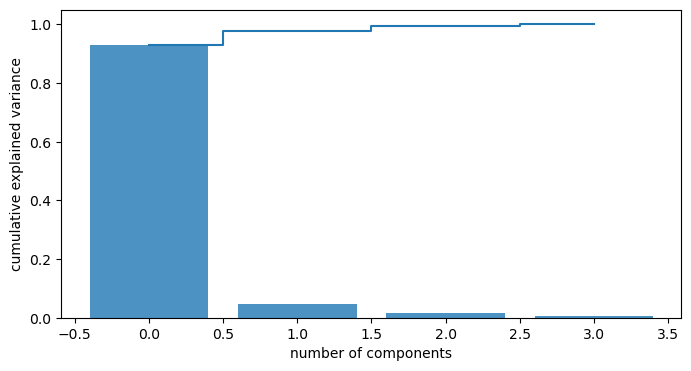

In [39]:
plt.figure(figsize=(8, 4))

pca = PCA().fit(X)

plt.bar(range(len(pca.explained_variance_ratio_)),
        pca.explained_variance_ratio_,
        alpha=0.8,
        align='center')

plt.step(range(len(pca.explained_variance_ratio_)),
         np.cumsum(pca.explained_variance_ratio_),
         where='mid')

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [40]:
pca.explained_variance_ratio_

array([0.93035174, 0.04705254, 0.01733114, 0.00526459])

In [41]:
total_var = np.cumsum(pca.explained_variance_ratio_)
for i in [0, 1, 2, 3]:
    print("Components: {:2d}, total explained variance: {:.2f}".format(i, total_var[i]))

Components:  0, total explained variance: 0.93
Components:  1, total explained variance: 0.98
Components:  2, total explained variance: 0.99
Components:  3, total explained variance: 1.00


In [42]:
pca = PCA(0.95)
X_pca = pca.fit_transform(X)

In [43]:
X_train_val_pca, X_test_pca, y_train_val_pca, y_test_pca = train_test_split(X_pca, Y, test_size=0.20, random_state=1, stratify=Y)
X_train_pca, X_val_pca, y_train_pca, y_val_pca = train_test_split(X_train_val_pca, y_train_val_pca, test_size=0.25, random_state=1, stratify=y_train_val_pca)

In [44]:
standard_scaler = StandardScaler()
standard_scaler.fit(X_train_pca)
X_train_pca = standard_scaler.transform(X_train_pca)
X_val_pca = standard_scaler.transform(X_val_pca)
X_test_pca = standard_scaler.transform(X_test_pca)

## Naive Bayes (PCA)

In [45]:
naive_bayes_pca = GaussianNB()
nb_p = evaluate_model(naive_bayes_pca, X_train_pca, y_train_pca, X_val_pca, y_val_pca)
nb_p.index = ['naive_bayes_pca']
results = pd.concat([nb_p, results], axis=0)
results.sort_values(by='f1_val',ascending=False).style.background_gradient(cmap = 'flare')

,f1_train,accuracy_train,precision_train,recall_train,f1_val,accuracy_val,precision_val,recall_val
decision_tree_grid,0.988499,0.988506,0.988877,0.988506,1.000000,1.000000,1.000000,1.000000
random_forest_grid,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
random_forest,1.000000,1.000000,1.000000,1.000000,0.965431,0.965517,0.968652,0.965517
decision_tree,1.000000,1.000000,1.000000,1.000000,0.931034,0.931034,0.931034,0.931034
naive_bayes,0.977011,0.977011,0.977011,0.977011,0.931034,0.931034,0.931034,0.931034
naive_bayes_pca,0.931034,0.931034,0.931034,0.931034,0.896292,0.896552,0.898990,0.896552
naive_bayes_grid,0.953997,0.954023,0.955427,0.954023,0.896292,0.896552,0.898990,0.896552


## Random Forest (PCA)

In [46]:
random_forest_pca = RandomForestClassifier()
rf_p = evaluate_model(random_forest_pca, X_train_pca, y_train_pca, X_val_pca, y_val_pca)
rf_p.index = ['random_forest_pca']
results = pd.concat([rf_p, results], axis=0)
results.sort_values(by='f1_val',ascending=False).style.background_gradient(cmap = 'flare')

,f1_train,accuracy_train,precision_train,recall_train,f1_val,accuracy_val,precision_val,recall_val
decision_tree_grid,0.988499,0.988506,0.988877,0.988506,1.000000,1.000000,1.000000,1.000000
random_forest_grid,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
random_forest_pca,1.000000,1.000000,1.000000,1.000000,0.965431,0.965517,0.968652,0.965517
random_forest,1.000000,1.000000,1.000000,1.000000,0.965431,0.965517,0.968652,0.965517
decision_tree,1.000000,1.000000,1.000000,1.000000,0.931034,0.931034,0.931034,0.931034
naive_bayes,0.977011,0.977011,0.977011,0.977011,0.931034,0.931034,0.931034,0.931034
naive_bayes_pca,0.931034,0.931034,0.931034,0.931034,0.896292,0.896552,0.898990,0.896552
naive_bayes_grid,0.953997,0.954023,0.955427,0.954023,0.896292,0.896552,0.898990,0.896552


## Decision Tree (PCA)

In [47]:
decision_tree_pca = DecisionTreeClassifier()
dt_p = evaluate_model(decision_tree_pca, X_train_pca, y_train_pca, X_val_pca, y_val_pca)
dt_p.index = ['decision_tree_pca']
results = pd.concat([dt_p, results], axis=0)
results.sort_values(by='f1_val',ascending=False).style.background_gradient(cmap = 'flare')

,f1_train,accuracy_train,precision_train,recall_train,f1_val,accuracy_val,precision_val,recall_val
decision_tree_grid,0.988499,0.988506,0.988877,0.988506,1.000000,1.000000,1.000000,1.000000
random_forest_grid,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
decision_tree_pca,1.000000,1.000000,1.000000,1.000000,0.965431,0.965517,0.968652,0.965517
random_forest_pca,1.000000,1.000000,1.000000,1.000000,0.965431,0.965517,0.968652,0.965517
random_forest,1.000000,1.000000,1.000000,1.000000,0.965431,0.965517,0.968652,0.965517
decision_tree,1.000000,1.000000,1.000000,1.000000,0.931034,0.931034,0.931034,0.931034
naive_bayes,0.977011,0.977011,0.977011,0.977011,0.931034,0.931034,0.931034,0.931034
naive_bayes_pca,0.931034,0.931034,0.931034,0.931034,0.896292,0.896552,0.898990,0.896552
naive_bayes_grid,0.953997,0.954023,0.955427,0.954023,0.896292,0.896552,0.898990,0.896552


In [48]:
X_train_val_pca_grid_search = np.concatenate((X_train_pca, X_val_pca), axis=0)
y_train_val_pca_grid_search = np.concatenate((y_train_pca, y_val_pca), axis=0)
test_fold = np.concatenate((np.full(len(X_train_pca), 0), np.full(len(X_val_pca), -1)), axis=0)
ps_pca = PredefinedSplit(test_fold)

## Naive Bayes (PCA) - Grid Search

In [49]:
param_grid_nb = {
    'var_smoothing': np.logspace(0, -9, num=200)
}
naive_bayes_pca_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, cv=ps_pca)
naive_bayes_pca_grid.fit(X_train_val_pca_grid_search, y_train_val_pca_grid_search)
naive_bayes_pca_grid = naive_bayes_pca_grid.best_estimator_
nb_p_g = evaluate_grid_search(naive_bayes_pca_grid, X_train_pca, y_train_pca, X_val_pca, y_val_pca)
nb_p_g.index = ['naive_bayes_pca_grid']
results = pd.concat([nb_p_g, results], axis=0)
results.sort_values(by='f1_val',ascending=False).style.background_gradient(cmap = 'flare')

,f1_train,accuracy_train,precision_train,recall_train,f1_val,accuracy_val,precision_val,recall_val
decision_tree_grid,0.988499,0.988506,0.988877,0.988506,1.000000,1.000000,1.000000,1.000000
random_forest_grid,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
decision_tree_pca,1.000000,1.000000,1.000000,1.000000,0.965431,0.965517,0.968652,0.965517
random_forest_pca,1.000000,1.000000,1.000000,1.000000,0.965431,0.965517,0.968652,0.965517
random_forest,1.000000,1.000000,1.000000,1.000000,0.965431,0.965517,0.968652,0.965517
decision_tree,1.000000,1.000000,1.000000,1.000000,0.931034,0.931034,0.931034,0.931034
naive_bayes,0.977011,0.977011,0.977011,0.977011,0.931034,0.931034,0.931034,0.931034
naive_bayes_pca_grid,0.907993,0.908046,0.909291,0.908046,0.896292,0.896552,0.898990,0.896552
naive_bayes_pca,0.931034,0.931034,0.931034,0.931034,0.896292,0.896552,0.898990,0.896552
naive_bayes_grid,0.953997,0.954023,0.955427,0.954023,0.896292,0.896552,0.898990,0.896552


## Random Forest (PCA) - Grid Search

In [50]:
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [4, 8, 16],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'random_state': [0, 42]
    }

random_forest_pca_grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_rf, cv=ps_pca)
random_forest_pca_grid.fit(X_train_val_pca_grid_search, y_train_val_pca_grid_search)
random_forest_pca_grid = random_forest_pca_grid.best_estimator_
rf_p_g = evaluate_grid_search(random_forest_pca_grid, X_train_pca, y_train_pca, X_val_pca, y_val_pca)
rf_p_g.index = ['random_forest_pca_grid']
results = pd.concat([rf_p_g, results], axis=0)
results.sort_values(by='f1_val',ascending=False).style.background_gradient(cmap = 'flare')

,f1_train,accuracy_train,precision_train,recall_train,f1_val,accuracy_val,precision_val,recall_val
random_forest_pca_grid,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
decision_tree_grid,0.988499,0.988506,0.988877,0.988506,1.000000,1.000000,1.000000,1.000000
random_forest_grid,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
decision_tree_pca,1.000000,1.000000,1.000000,1.000000,0.965431,0.965517,0.968652,0.965517
random_forest_pca,1.000000,1.000000,1.000000,1.000000,0.965431,0.965517,0.968652,0.965517
random_forest,1.000000,1.000000,1.000000,1.000000,0.965431,0.965517,0.968652,0.965517
decision_tree,1.000000,1.000000,1.000000,1.000000,0.931034,0.931034,0.931034,0.931034
naive_bayes,0.977011,0.977011,0.977011,0.977011,0.931034,0.931034,0.931034,0.931034
naive_bayes_pca_grid,0.907993,0.908046,0.909291,0.908046,0.896292,0.896552,0.898990,0.896552
naive_bayes_pca,0.931034,0.931034,0.931034,0.931034,0.896292,0.896552,0.898990,0.896552


## Decision Tree (PCA) - Grid Search

In [51]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [4, 8, 16, 32],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'random_state': [0, 42]
}

decision_tree_pca_grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_dt, cv=ps_pca)
decision_tree_pca_grid.fit(X_train_val_pca_grid_search, y_train_val_pca_grid_search)
decision_tree_pca_grid = decision_tree_pca_grid.best_estimator_
dt_p_g = evaluate_grid_search(decision_tree_pca_grid, X_train_pca, y_train_pca, X_val_pca, y_val_pca)
dt_p_g.index = ['decision_tree_pca_grid']
results = pd.concat([dt_p_g, results], axis=0)
results.sort_values(by='f1_val',ascending=False).style.background_gradient(cmap = 'flare')

,f1_train,accuracy_train,precision_train,recall_train,f1_val,accuracy_val,precision_val,recall_val
random_forest_pca_grid,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
decision_tree_grid,0.988499,0.988506,0.988877,0.988506,1.000000,1.000000,1.000000,1.000000
random_forest_grid,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
decision_tree_pca,1.000000,1.000000,1.000000,1.000000,0.965431,0.965517,0.968652,0.965517
random_forest_pca,1.000000,1.000000,1.000000,1.000000,0.965431,0.965517,0.968652,0.965517
random_forest,1.000000,1.000000,1.000000,1.000000,0.965431,0.965517,0.968652,0.965517
decision_tree,1.000000,1.000000,1.000000,1.000000,0.931034,0.931034,0.931034,0.931034
naive_bayes,0.977011,0.977011,0.977011,0.977011,0.931034,0.931034,0.931034,0.931034
decision_tree_pca_grid,0.977011,0.977011,0.977011,0.977011,0.930338,0.931034,0.942529,0.931034
naive_bayes_pca_grid,0.907993,0.908046,0.909291,0.908046,0.896292,0.896552,0.898990,0.896552


## Best Model on Test

In [52]:
pred = random_forest_pca_grid.predict(X_test_pca)
accuracy = accuracy_score(y_test_pca, pred)
f1 = f1_score(y_test_pca, pred, average='weighted')
precision = precision_score(y_test_pca, pred, average='weighted')
recall = recall_score(y_test_pca, pred, average='weighted')
print(f" f1:{f1}\n accuracy:{accuracy}\n precision:{precision}\n recall:{recall}")

 f1:0.9333333333333333
 accuracy:0.9333333333333333
 precision:0.9333333333333333
 recall:0.9333333333333333
